In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

In [5]:
result_dir_b = '/home/zabel/projects/MpsABC/results/blast/mspb/'

In [6]:
result_dir_a = '/home/zabel/projects/MpsABC/results/blast/mspa/'

In [8]:
# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives
# 3404 hits found
t_a = pd.read_csv(result_dir_a+'mpsa_staph.txt', sep='\t', header=None)

In [9]:
print(len(t_a))

778


In [10]:
# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives
# 3404 hits found
t_b = pd.read_csv(result_dir_b+'mpsb_staph.txt', sep='\t', header=None)

In [11]:
print(len(t_b))

261


In [12]:
# first 10 entries
t_a.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives']
t_b.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives']

In [14]:
ids_a = []
descriptions_a = []
records_a = []
sequences_a = []
for record in SeqIO.parse(open(result_dir_a + 'mpsa_staph.gb', 'r'), 'genbank'):
    ids_a.append(record.id)
    descriptions_a.append(record.description)
    records_a.append(record)
    sequences_a.append(str(record.seq))

In [15]:
ids_b= []
descriptions_b = []
records_b = []
sequences_b = []
for record in SeqIO.parse(open(result_dir_b + 'mpsb_staph.gb', 'r'), 'genbank'):
    ids_b.append(record.id)
    descriptions_b.append(record.description)
    records_b.append(record)
    sequences_b.append(str(record.seq))

In [16]:
print(len(ids_a), len(ids_b))

778 261


In [17]:
species_with_strains_a = [s[s.find("[")+1:s.find("]")] for s in descriptions_a]
species_a = [' '.join(species.split(' ')[:2]) for species in species_with_strains_a]

In [18]:
species_with_strains_b = [s[s.find("[")+1:s.find("]")] for s in descriptions_b]
species_b = [' '.join(species.split(' ')[:2]) for species in species_with_strains_b]

In [19]:
cds_a = []
for i in records_a:
    l = len(cds_a)
    for f in i.features:
        if f.type == 'CDS':
            cds_a.append(f.qualifiers['coded_by'][0])
    if len(i.id) == 8:
        cds_a.append(':-1..-1')
    if l == len(cds_a):
        cds_a.append(':-1..-1')

In [20]:
cds_b = []
for i in records_b:
    l = len(cds_b)
    for f in i.features:
        if f.type == 'CDS':
            cds_b.append(f.qualifiers['coded_by'][0])
    if len(i.id) == 8:
        cds_b.append(':-1..-1')
    if l == len(cds_b):
        cds_b.append(':-1..-1')

In [21]:
cds_mpsa_start = []
cds_mpsa_end = []
for i in cds_a:
    cds = i[i.find(':')+1:]
    start = cds[:cds.find('..')]
    end = cds[cds.find('..')+2:]
    if len(start)>10 or len(end)>10:
        cds_mpsa_start.append(-1)
        cds_mpsa_end.append(-1)
    else:
        if start[0] == '<':
            cds_mpsa_start.append(int(start[1:]))
        else: cds_mpsa_start.append(int(start))
        if (end[0] == '>') and (end[-1] ==')'):
            if(end[-2] ==')'):
                print(end)
                cds_mpsa_end.append(int(end[1:-2]))
            else:
                cds_mpsa_end.append(int(end[1:-1]))
        elif (end[0] == '>') and (end[-1] !=')'):
            cds_mpsa_end.append(int(end[1:]))
        elif (end[0] != '>') and (end[-1] ==')'):
            if (end[-2]==')'):
                cds_mpsa_end.append(int(end[:-2]))
            else:
                cds_mpsa_end.append(int(end[:-1]))
        else: 
            cds_mpsa_end.append(int(end))

In [22]:
cds_mpsb_start = []
cds_mpsb_end = []
for i in cds_b:
    cds = i[i.find(':')+1:]
    start = cds[:cds.find('..')]
    end = cds[cds.find('..')+2:]
    if len(start)>10 or len(end)>10:
        cds_mpsb_start.append(-1)
        cds_mpsb_end.append(-1)
    else:
        if start[0] == '<':
            cds_mpsb_start.append(int(start[1:]))
        else: cds_mpsb_start.append(int(start))
        if (end[0] == '>') and (end[-1] ==')'):
            if(end[-2] ==')'):
                print(end)
                cds_mpsb_end.append(int(end[1:-2]))
            else:
                cds_mpsb_end.append(int(end[1:-1]))
        elif (end[0] == '>') and (end[-1] !=')'):
            cds_mpsb_end.append(int(end[1:]))
        elif (end[0] != '>') and (end[-1] ==')'):
            if (end[-2]==')'):
                cds_mpsb_end.append(int(end[:-2]))
            else:
                cds_mpsb_end.append(int(end[:-1]))
        else: 
            cds_mpsb_end.append(int(end))

In [23]:
t_a[13] = ['' for i in range(len(t_a))]
t_a[14] = ['' for i in range(len(t_a))]
for i, j in enumerate(ids_a):
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 13]=species_a[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 14]=sequences_a[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 15]=descriptions_a[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 16]=cds_mpsa_start[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 17]=cds_mpsa_end[i]

In [24]:
t_b[13] = ['' for i in range(len(t_b))]
t_b[14] = ['' for i in range(len(t_b))]
for i, j in enumerate(ids_b):
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 13]=species_b[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 14]=sequences_b[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 15]=descriptions_b[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 16]=cds_mpsb_start[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 17]=cds_mpsb_end[i]

In [25]:
operons_a = []
operons_b = []
for s in list(set(t_b[13].tolist())):
    subset_a = t_a[t_a[13]==s]
    subset_b = t_b[t_b[13]==s]
    a_starts = t_a[t_a[13]==s][16].tolist()
    a_ends = t_a[t_a[13]==s][17].tolist()
    b_starts = t_b[t_b[13]==s][16].tolist()
    b_ends = t_b[t_b[13]==s][17].tolist()
    #print(a_starts, a_ends, b_starts, b_ends)
    for i in range(len(b_starts)):
        l = len(operons_a)
        d1 = []
        d2 = []
        for j in range(len(a_starts)):
            d1.append(abs(a_starts[j] - b_ends[i]))
            d2.append(abs(a_ends[j] - b_starts[i]))
        if len(d1)!=0:
            m1 = np.min(d1)
            m2 = np.min(d2)
            if m1<=m2:
                if m1<=100:
                    operons_a.append(subset_a.iloc[np.argmin(d1)]['subject acc.ver'])
                    operons_b.append(subset_b.iloc[i]['subject acc.ver'])
            else:
                if m2<=100:
                    operons_a.append(subset_a.iloc[np.argmin(d2)]['subject acc.ver'])
                    operons_b.append(subset_b.iloc[i]['subject acc.ver'])
        if l!=len(operons_a):
            break

In [26]:
print(len(operons_a), len(operons_b))

28 28


In [27]:
keep_a = t_a[t_a['subject acc.ver'].isin(operons_a)]
keep_b = t_b[t_b['subject acc.ver'].isin(operons_b)]

In [28]:
keep_a_s = keep_a.sort_values(by=13)

In [29]:
keep_b_s = keep_b.sort_values(by=13)

In [30]:
keep_a_s[13].tolist()

['Staphylococcus argenteus',
 'Staphylococcus arlettae',
 'Staphylococcus auricularis',
 'Staphylococcus capitis',
 'Staphylococcus caprae',
 'Staphylococcus cohnii',
 'Staphylococcus devriesei',
 'Staphylococcus epidermidis',
 'Staphylococcus equorum',
 'Staphylococcus gallinarum',
 'Staphylococcus haemolyticus',
 'Staphylococcus hominis',
 'Staphylococcus kloosii',
 'Staphylococcus lentus',
 'Staphylococcus lugdunensis',
 'Staphylococcus massiliensis',
 'Staphylococcus nepalensis',
 'Staphylococcus pasteuri',
 'Staphylococcus petrasii',
 'Staphylococcus pettenkoferi',
 'Staphylococcus saprophyticus',
 'Staphylococcus schweitzeri',
 'Staphylococcus sciuri',
 'Staphylococcus sp.',
 'Staphylococcus succinus',
 'Staphylococcus vitulinus',
 'Staphylococcus warneri',
 'Staphylococcus xylosus']

In [34]:
keep_a_s.tail(5)

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,13,14,15,16,17
605,YP_498998.1,RAL26245.1,48.676,491,245,1,11,494,14,504,1.090000e-149,443.0,68.64,Thermoflavimicrobium sp.,MLVLLDSLPILTAFSVSLAVCVLSAFIFLHPRVPLGFIRLHLGIIT...,NADH dehydrogenase subunit 5 [Thermoflavimicro...,241636.0,243171.0
193,YP_498998.1,OAH58611.1,50.920,489,233,1,13,494,16,504,2.740000e-175,508.0,71.17,[Bacillus,MLVSLSSSSLLSFFFIMLIASGLSGLLFLHPRVPLSFVRIHIGIVA...,NADH dehydrogenase [[Bacillus] aminovorans],28529.0,30061.0
552,YP_498998.1,YP_037261.1,50.410,488,235,1,11,491,14,501,1.630000e-167,488.0,70.49,[Bacillus thuringiensis,MLISLSSSTLLTLFFIALSASWLSGLLFLHARMPLRFVHIHIGIAA...,NADH dehydrogenase subunit 5 [[Bacillus thurin...,3015188.0,3016720.0
246,YP_498998.1,OEC77181.1,52.546,491,226,1,11,494,14,504,4.890000e-174,505.0,71.89,[Brevibacterium,MLVSLSLSSLLTLFFITLIASGISGLLFLHPRVSLGFVRIHIGILA...,NADH dehydrogenase [[Brevibacterium] halotoler...,31950.0,33467.0
809,YP_498998.1,CCQ98714.1,35.714,196,120,4,300,494,243,433,1.280000e-21,104.0,53.06,[Clostridium,MALRQACMVDLVLCFVARLDHSAVLYSVYARRPFLSFLFFASDGHG...,membrane hypothetical protein [[Clostridium] u...,16733.0,18049.0


In [35]:
keep_b_s.tail(5)

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,13,14,15,16,17
587,YP_498999.1,RAL26246.1,45.708,897,440,6,5,900,25,875,0.0,805.0,64.77,Thermoflavimicrobium sp.,MTVTSTLLEKVNLQKEKLTQDAPHLDINHLVKSASRVIAPLWPIAT...,DUF2309 domain-containing protein [Thermoflavi...,243168.0,245798.0
547,YP_498999.1,OAH58612.1,46.205,896,435,6,6,900,19,868,0.0,807.0,64.29,[Bacillus,MSVTSVLKKDINIDVQEDDINGLVESASRVIAPLSPISAFAARNPW...,hypothetical protein AWH48_16540 [[Bacillus] a...,30061.0,32667.0
178,YP_498999.1,YP_037260.1,46.094,896,436,6,6,900,25,874,0.0,822.0,64.51,[Bacillus thuringiensis,MSIPSILRKETLKKKDKNIDLQENNINDLVVSASRVIAPLWPISTF...,hypothetical protein BT9727_2937 [[Bacillus th...,3012564.0,3015188.0
699,YP_498999.1,OEC77535.1,46.162,899,428,9,6,900,25,871,0.0,780.0,64.40,[Brevibacterium,MGITSVLTKENVKKKETDIDVQERDINVLIESASRVIAPLWPISTF...,hypothetical protein BCV60_05855 [[Brevibacter...,33482.0,36097.0
810,YP_498999.1,CCQ98715.1,41.528,903,474,11,4,900,32,886,0.0,676.0,59.80,[Clostridium,MNRSALLPEQVVDDVNHLAENNGSHIGDSADHLPLDDLVGNAIQVI...,conserved hypothetical protein [[Clostridium] ...,18051.0,20756.0


In [31]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
outfile = '/share/home/zabel/final_blast_hits/' + 'mpsa_staph_hits_ab.fasta'
# keep only records which are in final list
keep_records = []
for i in range(len(keep_a_s)):
    r = SeqRecord(Seq(keep_a_s.iloc[i][14]), 
                 id=keep_a_s.iloc[i][13],
                 description='')
    keep_records.append(r)
with open (outfile, 'w') as output_handle:
    SeqIO.write(keep_records, output_handle, 'fasta')

In [32]:
outfile = '/share/home/zabel/final_blast_hits/' + 'mpsb_staph_hits_ab.fasta'
# keep only records which are in final list
keep_records = []
for i in range(len(keep_b_s)):
    r = SeqRecord(Seq(keep_b_s.iloc[i][14]), 
                 id=keep_b_s.iloc[i][13],
                 description='')
    keep_records.append(r)
with open (outfile, 'w') as output_handle:
    SeqIO.write(keep_records, output_handle, 'fasta')

Text(0.5, 1.0, 'Scatterplot')

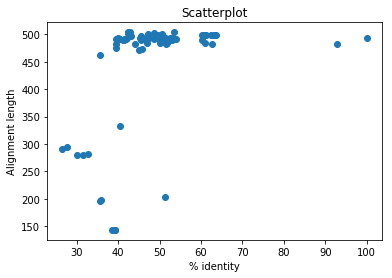

In [31]:
f = plt.figure()
plt.scatter(list(keep_a['% identity']), list(keep_a['alignment length']))
plt.xlabel('% identity')
plt.ylabel('Alignment length')
plt.title('Scatterplot')

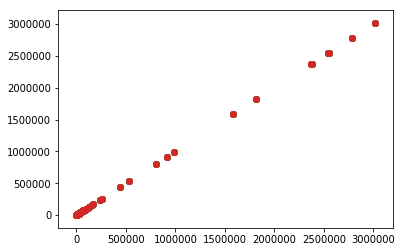

In [30]:
f = plt.figure()
for i in range(len(keep_a)):
    plt.scatter(keep_a_s[16].tolist(), keep_b_s[16].tolist())


In [38]:
descriptions_a

['NADH dehydrogenase [Staphylococcus sp. HMSC055H04]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC067F10]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC055H07]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC36C03]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC73A05]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC36A10]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC35D08]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC057B01]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC58B01]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC56B09]',
 'NADH dehydrogenase [Staphylococcus sp. HMSC062H10]',
 'NADH dehydrogenase%2C subunit 5 [Staphylococcus schweitzeri]',
 'NADH dehydrogenase subunit 5 [Staphylococcus schweitzeri]',
 'NADH dehydrogenase%2C subunit 5 [Staphylococcus schweitzeri]',
 'NADH dehydrogenase I, F subunit [Staphylococcus argenteus]',
 'NADH dehydrogenase%2C subunit 5 [Staphylococcus argenteus]',
 'NADH dehydrogenase subunit 5 [Staphylococcus capitis]',
 'NADH dehydrogenase subu